In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

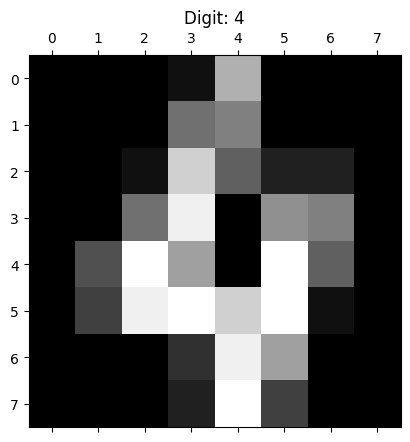

In [ ]:
sample = 4
plt.gray()
plt.matshow(digits.images[sample])
plt.title(f"Digit: {digits.target[sample]}")
plt.show()

In [ ]:
digits.images[sample]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [ ]:
y_train

array([4, 2, 4, ..., 0, 5, 5])

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
pred = model.predict(X_test[:10])
print("Predictions: ", pred)
print("Truth:       ", y_test[:10])

Predictions:  [1 0 2 3 0 4 6 4 6 8]
Truth:        [1 0 2 3 0 4 6 4 6 8]


In [ ]:
model.score(X_test, y_test)

0.9644444444444444

In [ ]:
import numpy as np

In [ ]:
# evaluate model accuracy for individual target digits to see what digits the model has more problems with
scores = np.zeros(10)
for dig in range(10):
  scores[dig] = model.score(X_test[y_test==dig], y_test[y_test==dig])
scores

array([0.98039216, 0.95555556, 1.        , 0.89090909, 0.95      ,
       1.        , 1.        , 1.        , 0.89795918, 1.        ])

Text(0.5, 1.0, 'Model Accuracy per Digit')

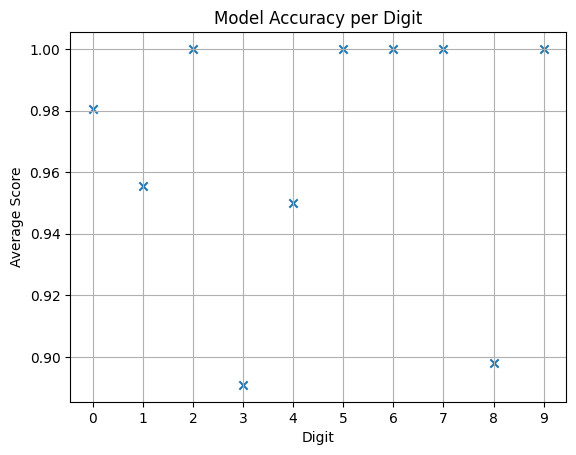

In [ ]:
plt.scatter(np.arange(10), scores, marker='x')
plt.xticks(np.arange(10))
plt.grid()
plt.xlabel("Digit"), plt.ylabel("Average Score")
plt.title("Model Accuracy per Digit")

In [ ]:
X_test[0]

array([ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
        0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
       12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
        0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
       16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.])

In [2]:
from PIL import Image

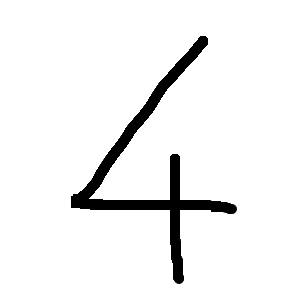

In [ ]:
img = Image.open("image.png")
img

In [ ]:
arr = np.array(img.convert("L").resize((8,8)))
arr= 16*(1-arr.astype('float64')/255)
arr.shape

(8, 8)

In [ ]:
# model expects batch dimension and flattened images
prep_img = np.expand_dims(arr.flatten(), axis=0)
prep_img.shape

(1, 64)

In [ ]:
model.predict(prep_img).item()

4

In [ ]:
model.score(prep_img, np.array([4]))

1.0

In [ ]:
probs = model.predict_proba(prep_img)
probs

array([[2.74072614e-04, 1.87440749e-01, 1.39259548e-04, 7.34907007e-05,
        5.82426215e-01, 3.80045522e-05, 1.46686971e-01, 2.98756960e-04,
        8.26223483e-02, 1.32618975e-07]])

In [ ]:
probs.flatten().argmax().item()

4

In [ ]:
round(probs.flatten().max().item()*100)

58

In [ ]:
X_train.shape

(1347, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.reshape(digits.data.shape) == digits.data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
digits.images[0].flatten() == digits.data[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
print(model.predict(np.expand_dims(X_test[0], axis=0)))
print(y_test[0])

[1]
1


In [ ]:
np.expand_dims(X_test[0], axis=0).shape

(1, 64)

In [ ]:
X_test[0]

array([ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
        0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
       12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
        0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
       16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.])

In [ ]:
import pickle

In [ ]:
with open("model_LogReg.pkl", "wb") as f:
    pickle.dump(model, f)

In [1]:
import torch as tc
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
nn.Sequential?

In [9]:
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.astype('float64').dtype

dtype('float64')

In [ ]:
y_train.dtype

dtype('uint8')

In [10]:
X_train, X_test = X_train.astype('float64'), X_test.astype('float64')

In [11]:
(X_train, y_train), (X_test, y_test) = (tc.tensor(X_train), tc.tensor(y_train)), (tc.tensor(X_test), tc.tensor(y_test))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

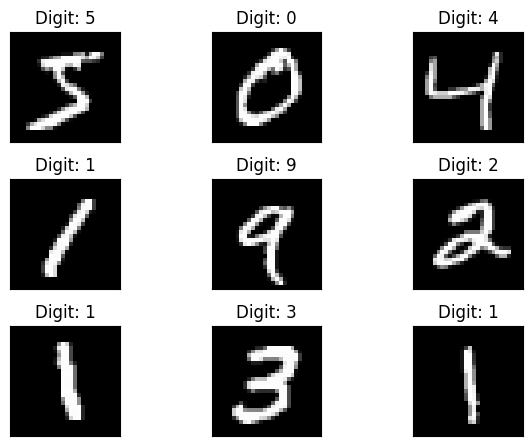

In [ ]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(int(y_train[i])))
    plt.xticks([])
    plt.yticks([])

In [4]:
conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=2, padding=1, dtype=tc.float64)
conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, padding=1, dtype=tc.float64)
pool = nn.MaxPool2d(2,2)
flat = nn.Flatten(start_dim=-3, end_dim=-1)
linear1 = nn.Linear(in_features=32*7*7, out_features=128, dtype=tc.float64)
linear2 = nn.Linear(in_features=128, out_features=10, dtype=tc.float64)

In [ ]:
# need to manually add dimension of shape 1 to mimic single grayscale channel
# (isnt by default in mnist set)
X_test.unsqueeze(1).shape

torch.Size([10000, 1, 28, 28])

In [12]:
X_train, X_test = X_train.unsqueeze(1), X_test.unsqueeze(1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 1, 28, 28]),
 torch.Size([10000]))

In [ ]:
out1 = conv1(X_train[:10])
out1.shape

torch.Size([10, 16, 29, 29])

In [ ]:
out_pool1 = pool(out1)
out_pool1.shape

torch.Size([10, 16, 14, 14])

In [ ]:
out2 = conv2(out_pool1)
out2.shape

torch.Size([10, 32, 15, 15])

In [ ]:
out_pool2 = pool(out2)
out_pool2.shape

torch.Size([10, 32, 7, 7])

In [ ]:
out_flat = flat(out_pool2)
out_flat.shape

torch.Size([10, 1568])

In [ ]:
32*7*7

1568

In [ ]:
out = linear1(out_flat)
out.shape

torch.Size([10, 128])

In [ ]:
out = linear2(out)
out.shape

torch.Size([10, 10])

In [ ]:
try:
  assert 2 < 1, "Hä?!"
except AssertionError as e:
  print(e.args[0])

Hä?!


In [5]:
model = nn.Sequential(
    conv1,
    nn.ReLU(),
    pool,
    conv2,
    nn.ReLU(),
    pool,
    flat,
    linear1,
    nn.ReLU(),
    linear2
)
# no softmax at the end because probabilites are implicitly generated during training in Cross Entropy loss
# add softmax in code when manually predicting on unlabeled input

epochs = 10
learning_rate = 0.0001
loss_fn = nn.CrossEntropyLoss()
optimizer = tc.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = tc.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# SGD

In [ ]:
scheduler = tc.optim.lr_scheduler.StepLR?

In [ ]:
optimizer.param_groups[0]["lr"]

0.1

In [ ]:
optimizer.state_dict()["param_groups"][0]["lr"] = 0.1

In [ ]:
optimizer.state_dict()["param_groups"][0]["lr"]

0.0001

In [ ]:
out = model(X_train[:10])
out.shape

torch.Size([10, 10])

In [ ]:
y_train[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=torch.uint8)

In [ ]:
nn.CrossEntropyLoss?

In [ ]:
loss_fn(out, y_train[:10])

tensor(12.4070, dtype=torch.float64, grad_fn=<NllLossBackward0>)

In [ ]:
_, argmax = tc.max(out, axis=1) # returns max and argmax automatically
argmax

tensor([2, 2, 5, 7, 5, 7, 2, 5, 2, 5])

In [ ]:
(argmax == y_train[:10]).sum().item()

0

In [ ]:
len(y_train)

60000

In [6]:
# Decide which device we want to run on
device = tc.device("cuda:0" if (tc.cuda.is_available()) else "cpu")
device

device(type='cpu')

In [ ]:
train_dataloader = DataLoader(TensorDataset(X_train,y_train), batch_size=64, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_test,y_test), batch_size=1000, shuffle=False)

In [ ]:
dl = DataLoader(TensorDataset(X_test,y_test), batch_size=64)

In [ ]:
len(dl)

157

In [ ]:
X,y = next(iter(dl))
X.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
(y == y_test[:64]).all()

tensor(True)

In [ ]:
(X == X_test[:64]).all()

tensor(True)

In [ ]:
%%time
train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

model = model.to(device)
for epoch in range(epochs):

  print(f"Epoch {epoch+1} / {epochs}")
  print(f"Current Learning Rate: {optimizer.param_groups[0]['lr']}\n")

  # ----------- Train Loop ----------------
  model.train()
  train_loss_per_epoch, train_correct = 0, 0
  for batchnumber, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)

    logits = model(X)
    loss = loss_fn(logits, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_per_epoch += loss.item()
    _, argmax = tc.max(logits, axis=1) # returns max and argmax automatically
    train_correct += (argmax == y).sum().item()

    # keep track of progress
    if batchnumber % 90 == 0:
      print(f"Current batch {batchnumber+1} / {len(train_dataloader)}")

  train_loss_per_epoch /= len(train_dataloader)
  train_loss.append(train_loss_per_epoch)
  train_acc = train_correct / len(y_train)
  train_accuracy.append(train_acc)

#------------ Test Loop -----------------
  model.eval()
  test_loss_per_epoch, test_correct = 0, 0
  for (X,y) in test_dataloader:
    X,y = X.to(device), y.to(device)

    logits = model(X)
    loss = loss_fn(logits, y)

    test_loss_per_epoch += loss.item()
    _, argmax = tc.max(logits, axis=1) # returns max and argmax automatically
    test_correct += (argmax == y).sum().item()

  test_loss_per_epoch /= len(test_dataloader)
  test_loss.append(test_loss_per_epoch)
  test_acc = test_correct / len(y_test)
  test_accuracy.append(test_acc)

  scheduler.step()




  print("----------------\n")

print("Done!")


Epoch 1 / 10
Current Learning Rate: 0.0001

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 361 / 938
Current batch 451 / 938
Current batch 541 / 938
Current batch 631 / 938
Current batch 721 / 938
Current batch 811 / 938
Current batch 901 / 938
----------------

Epoch 2 / 10
Current Learning Rate: 0.0001

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 361 / 938
Current batch 451 / 938
Current batch 541 / 938
Current batch 631 / 938
Current batch 721 / 938
Current batch 811 / 938
Current batch 901 / 938
----------------

Epoch 3 / 10
Current Learning Rate: 0.0001

Current batch 1 / 938
Current batch 91 / 938
Current batch 181 / 938
Current batch 271 / 938
Current batch 361 / 938
Current batch 451 / 938
Current batch 541 / 938
Current batch 631 / 938
Current batch 721 / 938
Current batch 811 / 938
Current batch 901 / 938
----------------

Epoch 4 / 10
Current Learning R

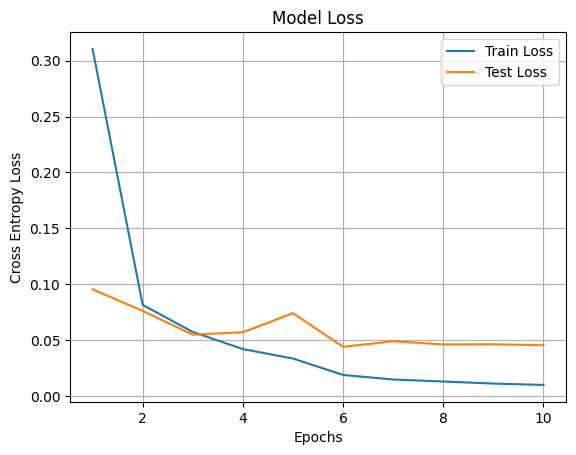

In [ ]:
plt.plot(np.arange(1,epochs+1), train_loss, label="Train Loss")
plt.plot(np.arange(1,epochs+1), test_loss, label="Test Loss")
plt.title("Model Loss")
plt.xlabel("Epochs"), plt.ylabel("Cross Entropy Loss")
plt.grid(), plt.legend()
plt.show()

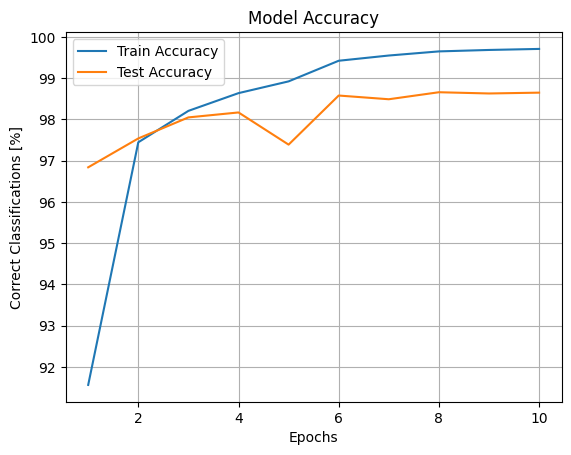

In [ ]:
plt.plot(np.arange(1,epochs+1), np.array(train_accuracy)*100, label="Train Accuracy")
plt.plot(np.arange(1,epochs+1), np.array(test_accuracy)*100, label="Test Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs"), plt.ylabel("Correct Classifications [%]")
plt.grid(), plt.legend()
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#tc.save(model.state_dict(), '/content/drive/MyDrive/CNN_Digit.ptc')

In [7]:
model.load_state_dict(tc.load('/content/drive/MyDrive/CNN_Digit.ptc', map_location=device))
model.to(device)
model.eval()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=-3, end_dim=-1)
  (7): Linear(in_features=1568, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

In [68]:
pred = model(X_test[:3].to(device))
probs = F.softmax(pred, dim=-1)
probs

tensor([[3.1669e-10, 8.5781e-10, 2.1767e-07, 9.6769e-09, 3.9555e-11, 4.4872e-11,
         5.0287e-18, 1.0000e+00, 1.8192e-11, 6.2043e-09],
        [3.3972e-13, 2.3020e-09, 1.0000e+00, 1.8658e-14, 3.5579e-16, 2.1993e-16,
         5.7023e-12, 1.6556e-14, 7.7550e-12, 1.3839e-16],
        [2.8210e-06, 9.9997e-01, 9.8464e-08, 1.4857e-08, 6.8216e-06, 6.0365e-09,
         5.3139e-07, 1.3623e-05, 9.6088e-07, 1.6549e-06]], dtype=torch.float64,
       grad_fn=<SoftmaxBackward0>)

In [69]:
pred.shape, probs.shape

(torch.Size([3, 10]), torch.Size([3, 10]))

In [14]:
probs[0].argmax().item()

7

In [15]:
y_test[0].item()

7

In [16]:
for i in range(10):
  print(f"Model Prediction: {probs[i].argmax().item()}, True Label: {y_test[i].item()}")

Model Prediction: 7, True Label: 7
Model Prediction: 2, True Label: 2
Model Prediction: 1, True Label: 1
Model Prediction: 0, True Label: 0
Model Prediction: 4, True Label: 4
Model Prediction: 1, True Label: 1
Model Prediction: 4, True Label: 4
Model Prediction: 9, True Label: 9
Model Prediction: 5, True Label: 5
Model Prediction: 9, True Label: 9


In [17]:
from PIL import Image

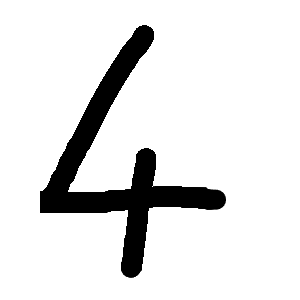

In [75]:
img = Image.open("/content/drive/MyDrive/handwritten4_thick20.png")
img

In [76]:
arr = np.array(img.convert("L").resize((28,28)))
arr= 16*(1-arr.astype('float64')/255)
arr.shape

(28, 28)

In [20]:
X_test[0].shape

torch.Size([1, 28, 28])

In [77]:
tens = tc.tensor(arr, requires_grad=False).to(device)
tens = tens.unsqueeze(dim=0)
tens.shape

torch.Size([1, 28, 28])

In [78]:
print(arr[12])
print(tens[0,12])

[ 0.          0.          0.          0.          0.          0.
  2.94901961 15.49803922 15.05882353  1.94509804  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.9490, 15.4980,
        15.0588,  1.9451,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000], dtype=torch.float64)


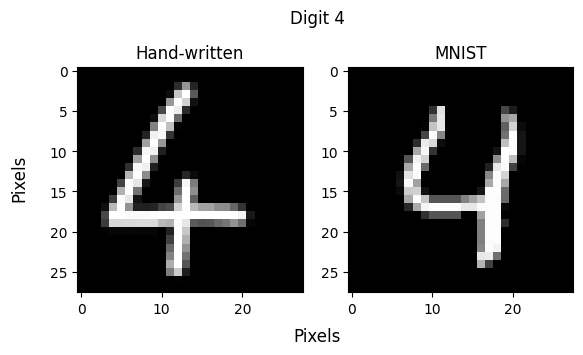

In [79]:
fig = plt.figure()

plt.subplot(1,2,1)
plt.imshow(tens[0].numpy(), cmap="gray")
plt.title("Hand-written")

plt.subplot(1,2,2)
plt.imshow(X_test[4,0].detach().numpy(), cmap="gray")
plt.title("MNIST")

fig.suptitle("Digit 4", y=0.85)
fig.supxlabel("Pixels", y=0.15), fig.supylabel("Pixels")

plt.show()

In [40]:
y_test[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=torch.uint8)

In [71]:
model(tens).shape

torch.Size([10])

In [80]:
pred = F.softmax(model(tens), dim=-1)
pred

tensor([0.0930, 0.1037, 0.1182, 0.0667, 0.1095, 0.0830, 0.1954, 0.1177, 0.0724,
        0.0405], dtype=torch.float64, grad_fn=<SoftmaxBackward0>)

In [95]:
tc.max(pred)

tensor(0.1954, dtype=torch.float64, grad_fn=<MaxBackward1>)

In [81]:
pred.argmax().item()

6

In [99]:
conf, classification = tc.max(pred, axis=0)
conf.item(), classification.item()

(0.19544387130203056, 6)

In [83]:
fours = X_train.detach().numpy()[y_train.detach().numpy() == 4]
fours.shape

(5842, 1, 28, 28)

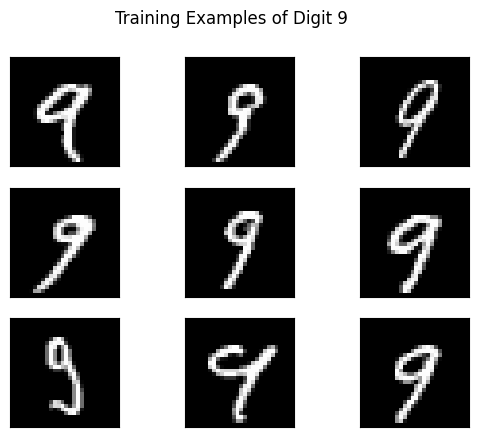

In [112]:
digit = 9
digits = X_train.detach().numpy()[y_train.detach().numpy() == digit]
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(digits[i,0], cmap="gray")
  plt.xticks([])
  plt.yticks([])
plt.suptitle(f"Training Examples of Digit {digit}")
plt.show()